# Task 2: Linear and Multivariable Regression

Members: Lars Olav Thorbjørnsen, Stein Are Årsnes og Sanjai Vijayaratnam

### Abstract

Linear and multivariable regression models were developed in this task to estimate Vp based on log data. Linear regression models tested each feature's prediction for Vp independently, while multivariable regression uses multiple features at a time to increase accuracy. 

### Introduction

In [7]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score  



#### Linear Regression
#### Vs

[1.70152877] 0.34695867103961797
Model 1: Vp vs (Vs)
Mean Squared Error: 0.03047353102421406
Root Mean Squared Error: 0.17456669506012326
R-Square: 0.6877067952761378
Adjusted R-Square: 0.6866692763235669


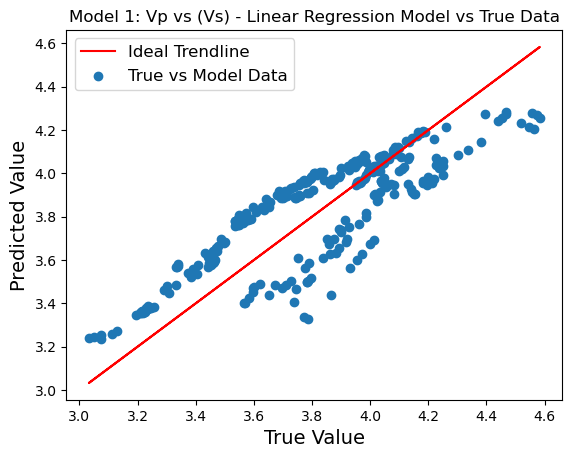

[2.70846591] -2.6929728100190142
Model 2: Vp vs (DEN)
Mean Squared Error: 0.02138542281443235
Root Mean Squared Error: 0.14623755610113412
R-Square: 0.7808418650340465
Adjusted R-Square: 0.7801137649178805


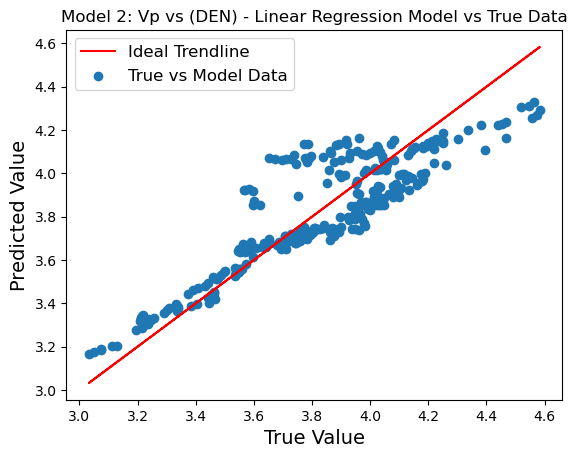

[-5.2164696] 4.944747192340967
Model 3: Vp vs (NEU)
Mean Squared Error: 0.016630516874624374
Root Mean Squared Error: 0.1289593613299336
R-Square: 0.8295702126916662
Adjusted R-Square: 0.8290040007736983


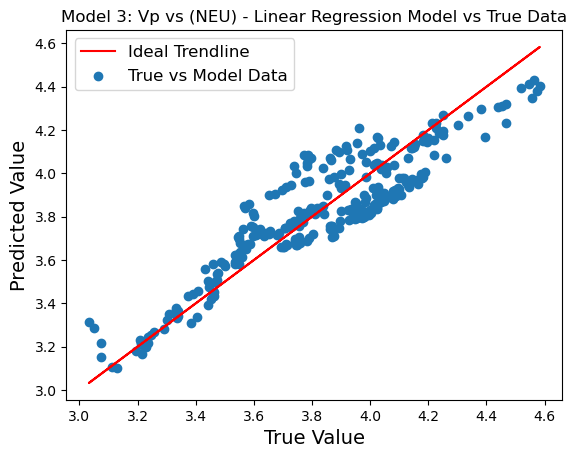

In [ ]:
df = pd.read_excel('CleanedFeatureSelectedFiltered.xlsx')

def LinReg(X, y, text):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
    regression = LinearRegression()
    regression.fit(x_train, y_train)
    y_pred = regression.predict(x_test)
    print(regression.coef_, regression.intercept_)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{text}')
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:',rmse)
    print('R-Square:',r2 )

    plt.plot(y_test,y_test, '-r')
    plt.scatter(y_test, y_pred)

    n = len(y_test)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print("Adjusted R-Square:", adjusted_r2)

    plt.title(f'{text} - Linear Regression Model vs True Data')
    plt.xlabel('True Value',fontsize=14)
    plt.ylabel('Predicted Value',fontsize=14)
    plt.legend(['Ideal Trendline', 'True vs Model Data'], loc='upper left', fontsize=12)
    plt.show()

y = df['Vp']
X = df[['Vs']]
LinReg(X, y, "Model 1: Vp vs (Vs)")

X = df[['DEN']]
LinReg(X, y, "Model 2: Vp vs (DEN)")

X = df[['NEU']]
LinReg(X, y, "Model 3: Vp vs (NEU)")


In [ ]:
def Co(X,y, text):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
    regression = LinearRegression()
    regression.fit(x_train, y_train)
    y_pred = regression.predict(x_test)

    Co_true = np.array(0.77*y_test**2.93)
    Co_my_model = 0.77*y_pred**2.93
    Co_Castagna = np.array(0.77*(1.16*x_test + 1.36)**2.93)
    print(f'{text} R2=', r2_score(Co_true, Co_my_model))
    fig, axes = plt.subplots(1, 2, figsize=(8,4), dpi = 380)

    fig.suptitle("Uniaxial Compressive Strength (C0) Comparison")
    # Plotting regression model predicted C0 and true C0
    axes[0].plot(Co_true, label = "True", color = "red")
    axes[0].plot(Co_my_model, label = "Predicted", color = "green")
    axes[0].set_xlabel("Row number")
    axes[0].set_ylabel("C0 (MPa)")
    axes[0].set_title("My Regression model predicted C0 vs. true C0")
    axes[0].legend()


    # Plotting literature model (Castagna et al. (1985)) predicted C0 and true C0
    axes[1].plot(Co_true, label = "True", color = "red")
    axes[1].plot(Co_Castagna, label = "Model (Castagna et al. 1985)", color = "blue")
    axes[1].set_xlabel("Row number")
    axes[1].set_ylabel("C0 (MPa)")
    axes[1].set_title("Literature model predicted C0 vs. true C0")
    axes[1].legend()
    plt.tight_layout()
    plt.show()

y = df["Vp"]
X = df[["Vs"]]


### Multivariable regression

Model 1: Vp vs (Vs, DEN)
Mean Squared Error: 0.002975878622024917
Root Mean Squared Error: 0.054551614293482806
R-Square: 0.9695031510787857
Adjusted R-Square: 0.9692998387526442


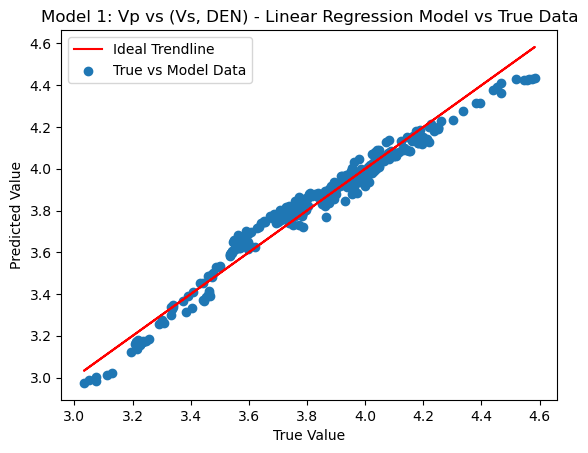



Model 2: Vp vs (Vs, NEU)
Mean Squared Error: 0.00478381368896647
Root Mean Squared Error: 0.06916511901939063
R-Square: 0.9509754052937897
Adjusted R-Square: 0.9506485746624149


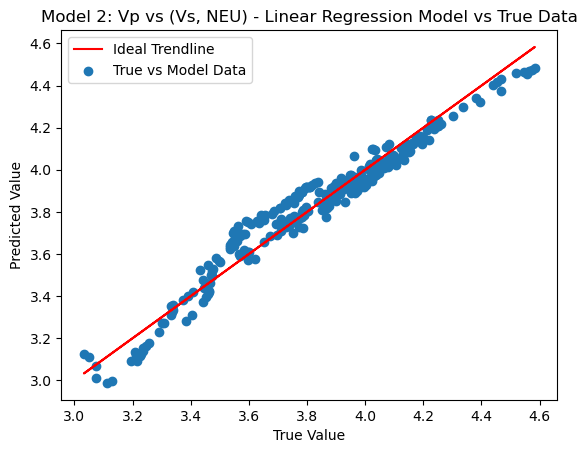



Model 3: Vp vs (DEN, NEU)
Mean Squared Error: 0.01659739126733271
Root Mean Squared Error: 0.12883086302331717
R-Square: 0.8299096844139066
Adjusted R-Square: 0.828775748976666


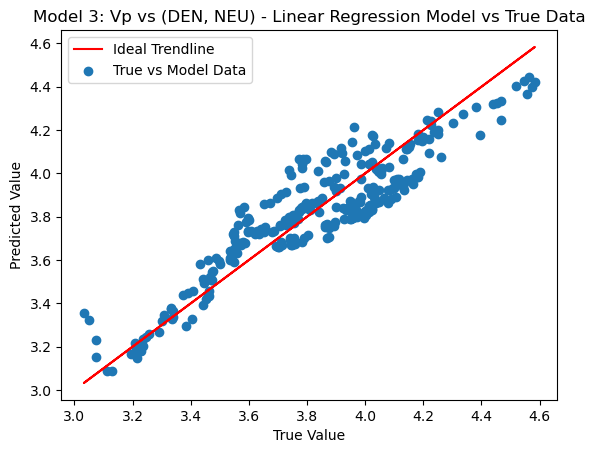



Model 4: Vp vs (Vs, DEN, NEU)
Mean Squared Error: 0.00295606848381938
Root Mean Squared Error: 0.05436973867712976
R-Square: 0.9697061656733633
Adjusted R-Square: 0.9694022141583803


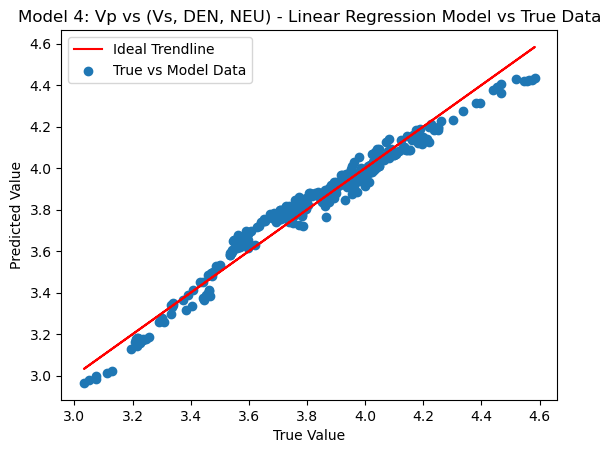

In [9]:
def multivariable_regression(X, y, title):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    regression = LinearRegression()
    
    regression.fit(X_train, y_train)
    
    y_pred = regression.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{title}")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-Square:", r2)
    
    n = len(y_test)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print("Adjusted R-Square:", adjusted_r2)
    
    plt.figure()
    plt.plot(y_test, y_test, '-r')  # Ideal trend line
    plt.scatter(y_test, y_pred)
    plt.title(f'{title} - Linear Regression Model vs True Data')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.legend(['Ideal Trendline', 'True vs Model Data'])
    plt.show()
    print("\n")

y = df['Vp']

X = df[['Vs', 'DEN']]
multivariable_regression(X, y, "Model 1: Vp vs (Vs, DEN)")

X = df[['Vs', 'NEU']]
multivariable_regression(X, y, "Model 2: Vp vs (Vs, NEU)")

X = df[['DEN', 'NEU']]
multivariable_regression(X, y, "Model 3: Vp vs (DEN, NEU)")

X = df[['Vs', 'DEN', 'NEU']]
multivariable_regression(X, y, "Model 4: Vp vs (Vs, DEN, NEU)")


### Reflections

### Conclusion

### References